

---Start the analysis---


The purpose of this python tools programming exercise is to extract the restaurant-only
data from  the yelp data for USA and Canadian businesses and then analyze it.
The initial data is obtained from
https://www.kaggle.com/yelp-dataset/yelp-dataset/version/6#yelp_business.csv
and saved in a local direcory as
business.csv


Initial read of the csv file:
csvfile:  business.csv


Initial inspection of the dataframe:

df.shape:
(192609, 15)

df.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 15 columns):
Unnamed: 0      192609 non-null int64
address         184927 non-null object
attributes      163773 non-null object
business_id     192609 non-null object
categories      192127 non-null object
city            192608 non-null object
hours           147779 non-null object
is_open         192609 non-null int64
latitude        192609 non-null float64
longitude       192609 non-null float64
name            1

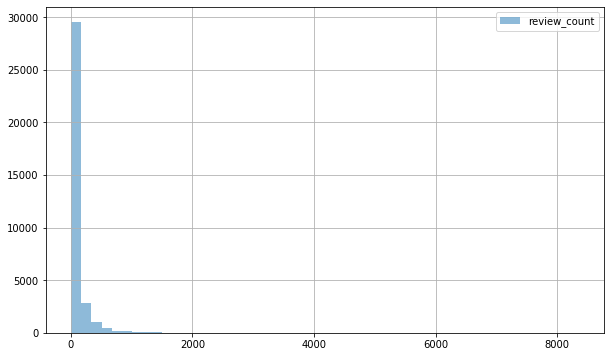

column:  stars

Histogram for a column:

column:  stars


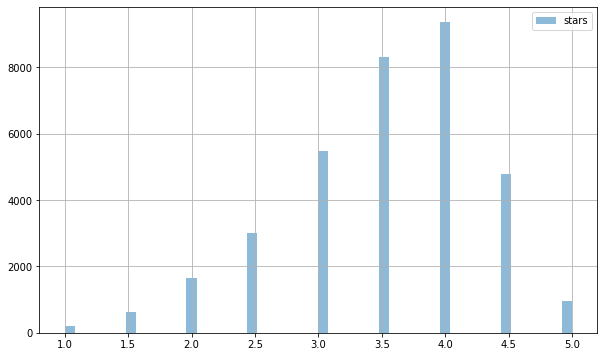


Use scatter_matrix to see the histograms and also to see if there are correlations between the columns:



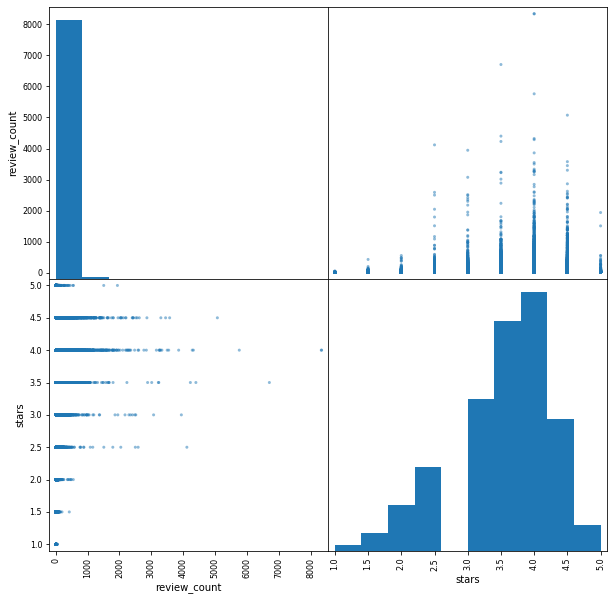

Create a geoDataFrame of the restaurant data and use it to
restaurant_gdf.head():
                      address  \
1        30 Eglinton Avenue W   
2   10110 Johnston Rd, Ste 15   
11    2450 E Indian School Rd   
13            5981 Andrews Rd   
25      6055 E Lake Mead Blvd   

                                           attributes             business_id  \
1   {'RestaurantsReservations': 'True', 'GoodForMe...  QXAEGFB4oINsVuTFxEYKFQ   
2   {'GoodForKids': 'True', 'NoiseLevel': "u'avera...  gnKjwL_1w79qoiV3IC_xQQ   
11  {'RestaurantsTakeOut': 'True', 'BusinessParkin...  1Dfx3zM-rW4n-31KeC8sJg   
13  {'RestaurantsPriceRange2': '2', 'BusinessAccep...  fweCYi8FmbJXHCqLnwuk8w   
25  {'BikeParking': 'True', 'BusinessParking': "{'...  tstimHoMcYbkSC4eBA1wEg   

                                           categories                city  \
1   Specialty Food, Restaurants, Dim Sum, Imported...         Mississauga   
2                   Sushi Bars, Restaurants, Japanese           Charlotte   
1

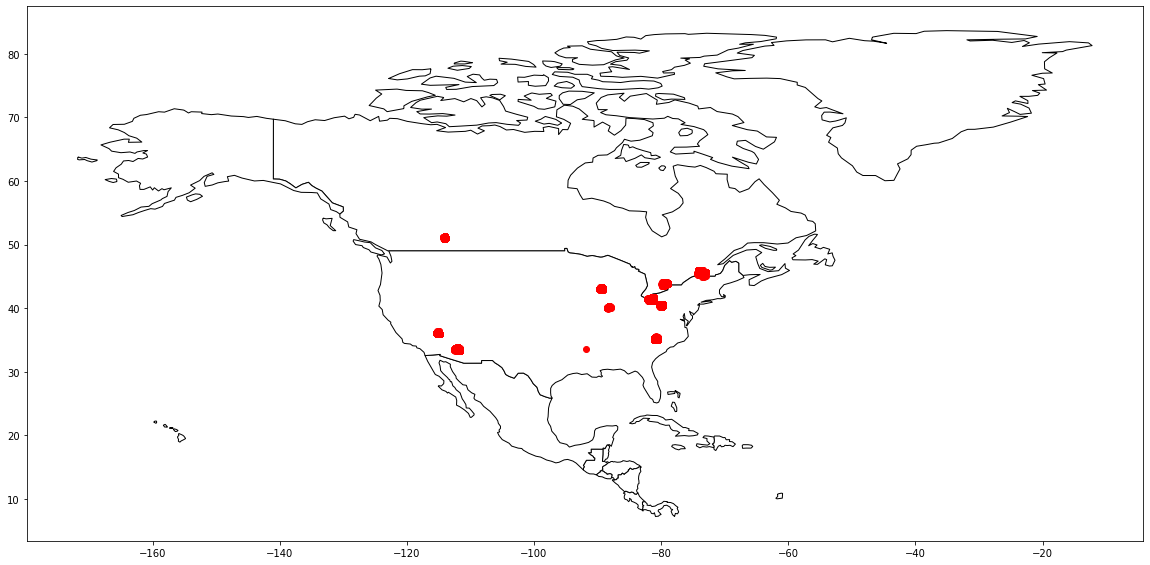


It can be seen that restaurant data only exist for the continental USA (i.e., no Alaska or Hawaii) and a few bordering provinces of Canada
Thus restrict the map to get a better picture

usa1.head():
  GID_0         NAME_0    GID_1      NAME_1  VARNAME_1 NL_NAME_1 TYPE_1  \
0   USA  United States  USA.1_1     Alabama    AL|Ala.      None  State   
1   USA  United States  USA.2_1      Alaska  AK|Alaska      None  State   
2   USA  United States  USA.3_1     Arizona   AZ|Ariz.      None  State   
3   USA  United States  USA.4_1    Arkansas    AR|Ark.      None  State   
4   USA  United States  USA.5_1  California  CA|Calif.      None  State   

  ENGTYPE_1  CC_1 HASC_1                                           geometry  
0     State  None  US.AL  (POLYGON ((-87.97000122 30.67666626, -87.96971...  
1     State  None  US.AK  (POLYGON ((-179.13146973 51.20972061, -179.132...  
2     State  None  US.AZ  POLYGON ((-110.82376099 31.33125305, -110.8260...  
3     State  None  US.AR  POLYGON ((-

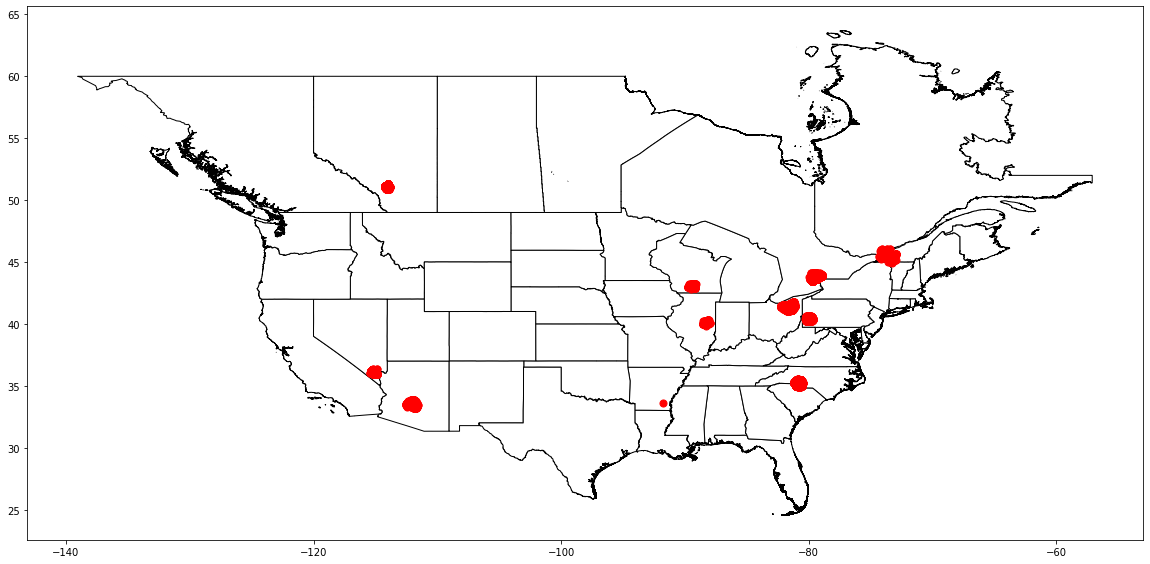




---It can be seen that about 8k restaurants got very few reviews. Make a decision to recommend based on some thresholds which are:---
Also note that there are locations in 11 states or provinces. Try to retain at least 1 in each.
stars >=  4.5
review_count >=  100
exclude_states:  []

Doing a cycle of applying thresholds

cycle:  1

Inspect the data before applying the thresholds:

df.shape:
(34392, 12)

df.info():
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 34392 entries, 1 to 192603
Data columns (total 12 columns):
address         34392 non-null object
attributes      33237 non-null object
business_id     34392 non-null object
categories      34392 non-null object
city            34392 non-null object
hours           34392 non-null object
name            34392 non-null object
postal_code     34389 non-null object
review_count    34392 non-null int64
stars           34392 non-null float64
state           34392 non-null object
geometry        34392 non-null object
dtyp

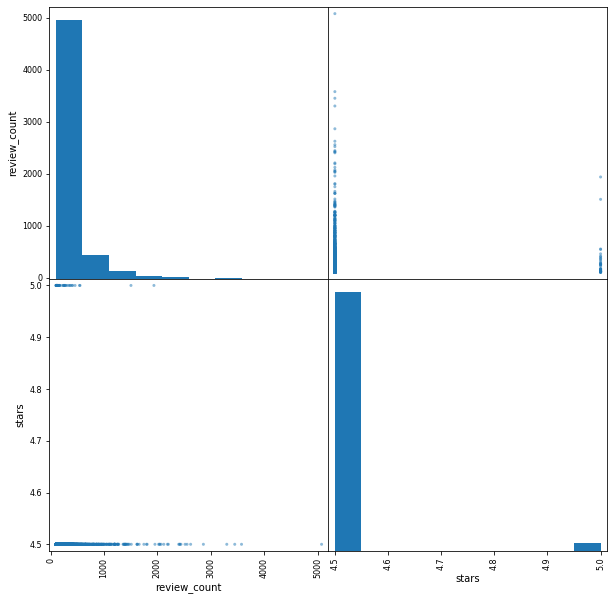


Construct a dictionary to count number restaurants in each unique state/province

{'NV': 455, 'PA': 86, 'ON': 93, 'NC': 100, 'AZ': 560, 'QC': 53, 'SC': 7, 'OH': 88, 'WI': 31, 'AB': 12, 'IL': 7}

Geographical distribution:


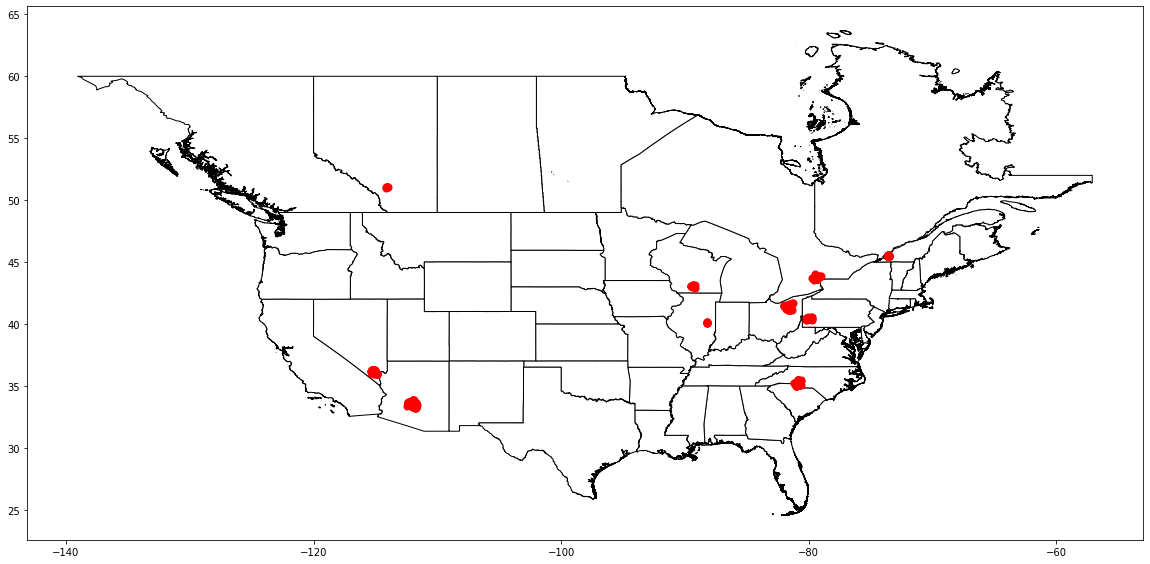



stars >=  5.0
review_count >=  200
exclude_states:  []

Doing a cycle of applying thresholds

cycle:  2

Inspect the data before applying the thresholds:

df.shape:
(1492, 12)

df.info():
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1492 entries, 25 to 192571
Data columns (total 12 columns):
address         1492 non-null object
attributes      1489 non-null object
business_id     1492 non-null object
categories      1492 non-null object
city            1492 non-null object
hours           1492 non-null object
name            1492 non-null object
postal_code     1492 non-null object
review_count    1492 non-null int64
stars           1492 non-null float64
state           1492 non-null object
geometry        1492 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 151.5+ KB
None



Apply the thresholds:


Re-inspect the data after applying the thresholds:

df.shape:
(19, 12)

df.info():
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 19 entries

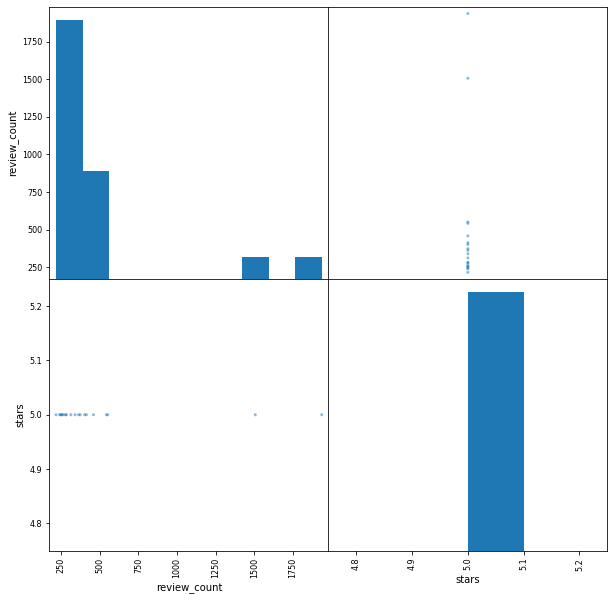


Construct a dictionary to count number restaurants in each unique state/province

{'AZ': 9, 'NV': 8, 'QC': 1, 'ON': 1}

Geographical distribution:


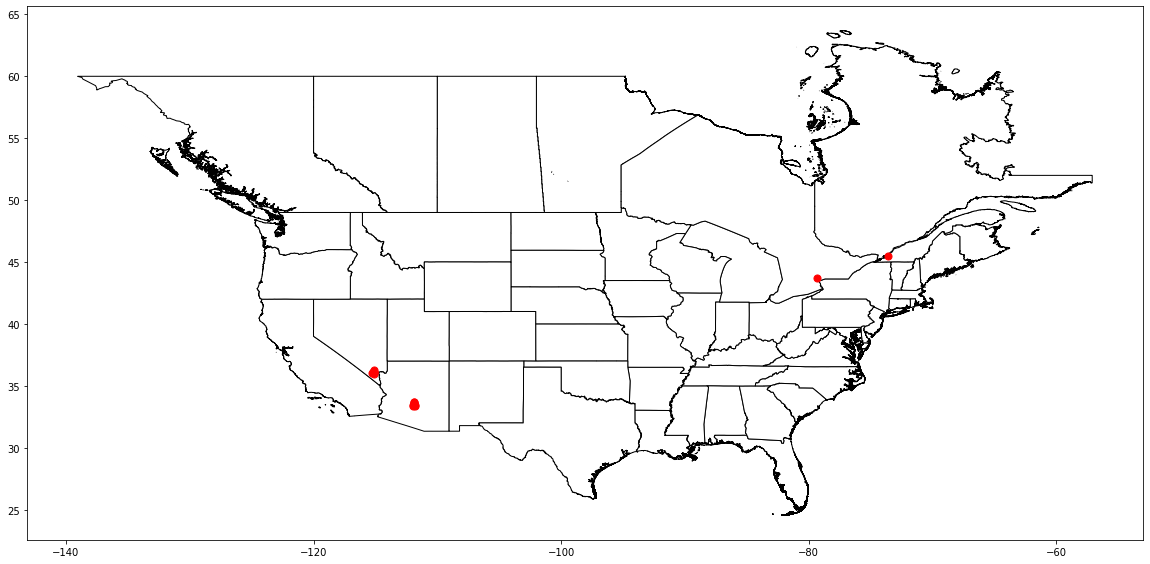




Thus by tightening thresholds we reduced the data to only 19 restaurants in 4 states/provinces:
{'AZ': 9, 'NV': 8, 'QC': 1, 'ON': 1}
The user can then select the appropriate restauirant based on cuisine, etc.


restaurant_gdf:
                                 address  \
18690               4301 E University Dr   
38760              1615 S Las Vegas Blvd   
44484       3430 E Tropicana Ave, Ste 32   
50434     18221 N Pima Rd, Ste 100 & 105   
52150              1201 Avenue Van Horne   
63348                1262 Don Mills Road   
92813       7380 S Rainbow Blvd, Ste 101   
114022  15040 N Northsight Blvd, Ste 104   
114957      10895 S Eastern Ave, Ste 100   
119721    7605 E Pinnacle Peak Rd, Ste 3   
121204              3957 S Maryland Pkwy   
122966           655 W Craig Rd, Ste 118   
123429                     218 W Main St   
125079             3635 Las Vegas Blvd S   
150805    1166 South Gilbert Rd, Ste 101   
151343                   3126 S Mill Ave   
157217               8

In [4]:
import pandas as pd
from pandas.plotting import scatter_matrix
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

def read_csv_file(csvfile, message):
    '''
    Reading in the dataframe from a csv file
    '''
    print()
    print(message)
    print('csvfile: ', csvfile)
    print()
    df = pd.read_csv(csvfile)
    return df

def inspect_data(df, message, head_lines=3, tail_lines=3):
    '''
    Inspecting the (geo)dataframe
    '''
    print()
    print(message); print()
    print('df.shape:')
    print(df.shape); print()
    print('df.info():')
    print(df.info()); print()
    if head_lines > 0:
        print('df.head(head_lines):')
        print(df.head(head_lines)); print()
    if tail_lines > 0:
        print('df.tail(tail_lines):')
        print(df.tail(tail_lines)); print()
    print()

def stats_on_columns(df, message, columns):
    '''
    Obtain simple statistics on selected columns in the (geo)dataframe
    '''
    print()
    print(message); print()
    print(df[columns].describe()); print()

def plot_histogram(df, message, column):
    '''
    Plot histograms on one selected column in the (geo)dataframe
    '''
    print()
    print(message); print()
    print("column: ", column)
    df[column].hist(label = column, bins = 50, figsize=(10,6), alpha=0.5)
#    plt.xlabel('column')
#    plt.ylabel('counts')
    plt.legend()
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

def plot_kde(df, message, column):
    '''
    Plot kde (analogous to an optimized histogram with an automatic bin size) on one selected column in the (geo)dataframe
    '''
    print()
    print(message); print()
    print("column: ", column)
    df[column].plot.kde(figsize=(10,6), alpha=0.5)
#    plt.xlabel('column')
#    plt.ylabel('counts')
    plt.legend()
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

def get_scatter_matrix(df, message, columns):
    '''
    Use scatter_matrix to see if there are correlations between the columns in the (geo)dataframe
    '''
    print()
    print(message); print()
    scatter_matrix(df[columns], figsize=(10,10), alpha=0.5)
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()
    
def get_freq(thelist, message): 
    '''
    Construct a dictionary to count occurences for each unique key; thelist is a column of a (geo)dataframe
    ''' 
    print()
    print(message); print()
    freq_dict = {} 
    for item in thelist: 
        if item in freq_dict: 
            freq_dict[item] += 1
        else: 
            freq_dict[item] = 1
    return freq_dict

def apply_thresholds(df, message, dict):
    '''
    Apply thresholds to the (geo)dataframe
    '''
    print()
    print(message); print()
    stars = dict.get('stars', 0.0)
    review_count = dict.get('review_count', 0)
#   if df['state'] != 'AR':
    df = df[df['stars'] >= stars]
    df = df[df['review_count'] >= review_count]
    return df

def do_cycle(gdf, cycle, thresh_dict, message):
    '''
    A cycle of doing steps of looking at the data after applying threshold(s)
    '''
    head_lines=0
    tail_lines=0

    print()
    print(message); print()
    print('cycle: ', cycle)
    message = 'Inspect the data before applying the thresholds:'
    inspect_data(gdf, message, head_lines, tail_lines)

    message = 'Apply the thresholds:'
    gdf = apply_thresholds(gdf, message, thresh_dict)

    message = 'Re-inspect the data after applying the thresholds:'
    inspect_data(gdf, message, head_lines, tail_lines)

    columns = ['review_count', 'stars']
    message = 'Statistics for some columns:'
    stats_on_columns(gdf, message, columns)

    message = 'Use scatter_matrix to see the histograms and also to see if there are correlations between the columns:'
    get_scatter_matrix(gdf, message, columns)
    message = 'Get some simple statistics and plot histograms for some columns:'
    columns = ['review_count', 'stars']

    message = 'Construct a dictionary to count number restaurants in each unique state/province'
#   gdf.sort_values(by=['state'])
    states_dict = get_freq(gdf['state'], message)
    print(states_dict)
    print()

    message = 'Geographical distribution:'
    print(message)
    ax = usa1_can1.plot(color='white', edgecolor='black', figsize=(20,12))
    gdf.plot(ax=ax, color='red', markersize=50)
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()
    print()
    return gdf


'''
main routine
'''

print()
print()
print('---Start the analysis---')
print()

http_address = 'https://www.kaggle.com/yelp-dataset/yelp-dataset/version/6#yelp_business.csv'
csvfile = 'business.csv'
message = '''
The purpose of this python tools programming exercise is to extract the restaurant-only
data from  the yelp data for USA and Canadian businesses and then analyze it.
The initial data is obtained from
https://www.kaggle.com/yelp-dataset/yelp-dataset/version/6#yelp_business.csv
and saved in a local direcory as
business.csv
'''
print(message)

message = 'Initial read of the csv file:'
business_df = read_csv_file(csvfile, message)

message = 'Initial inspection of the dataframe:'
inspect_data(business_df, message)

print()
print()
print('---Start removing unecessary data---')
message = '''
In this process we will reduce the size of the data
from a (192 609 x 15) table (22 MB)
to a (34 392 x 13) table (3.7 MB)
'''
print(message)
print()

head_lines=5
tail_lines=5

message = 'Re-inspect the dataframe after dropping unecessary column:'
business_df.drop(['Unnamed: 0'], axis=1, inplace=True)
inspect_data(business_df, message, head_lines, tail_lines)

message = 'Inspect the new dataframe containing only restaurants:'
restaurant_df = business_df[business_df['categories'].str.contains('Restaurants') == True]
inspect_data(restaurant_df, message, head_lines, tail_lines)

message = 'Inspect the dataframe containing only restaurants that are still open:'
restaurant_df = restaurant_df[restaurant_df.is_open != 0]
inspect_data(restaurant_df, message, head_lines, tail_lines)

message = 'Inspect the dataframe after dropping the now unnecessary column is_open:'
restaurant_df.drop(['is_open'], axis=1, inplace=True)
inspect_data(restaurant_df, message, head_lines, tail_lines)

head_lines=0
tail_lines=0

message = 'Inspect the dataframe containing only restaurants that have a valid address:'
restaurant_df = restaurant_df[restaurant_df['address'].str.contains('NaN') == False]
inspect_data(restaurant_df, message, head_lines, tail_lines)

message = 'Inspect the dataframe containing only restaurants that have valid hours:'
restaurant_df = restaurant_df[restaurant_df['hours'].str.contains('NaN') == False]
inspect_data(restaurant_df, message, head_lines, tail_lines)

message = 'Construct a dictionary to count number restaurants in each unique state/province'
#restaurant_df.sort_values(by=['state'])
states_dict = get_freq(restaurant_df['state'], message)
print(states_dict)
print()

print()
print()
print('---Finished removing unecessary data---')
print()

print()
print()
print('---Analyze some columns and see the geographic distribution of the data---')
cycle = 0
thresh_dict = {'stars': 0.0, 'review_count': 0, 'exclude_states': []}
print('stars >= ', thresh_dict.get('stars', 0.0))
print('review_count >= ', thresh_dict.get('review_count', 0))
print('exclude_states: ',  thresh_dict.get('exclude_states', []))
print()

columns = ['review_count', 'stars']
message = 'Statistics for some columns:'
stats_on_columns(restaurant_df, message, columns)

message = 'Histogram for a column:'
for column in columns:
    print('column: ', column)
    plot_histogram(restaurant_df, message, column)
    
'''
message = 'kde for a column:'
for column in columns:
    print('column: ', column)
    plot_kde(restaurant_df, message, column)

'''

message = 'Use scatter_matrix to see the histograms and also to see if there are correlations between the columns:'
get_scatter_matrix(restaurant_df, message, columns)

message = 'Create a geoDataFrame of the restaurant data and use it to'
print(message)

# https://medium.com/@shakasom/how-to-convert-latitude-longtitude-columns-in-csv-to-geometry-column-using-python-4219d2106dea
# creating a geometry column 
geometry = [Point(xy) for xy in zip(restaurant_df['longitude'], restaurant_df['latitude'])]
# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}
# Creating a Geographic data frame
restaurant_gdf = gpd.GeoDataFrame(restaurant_df, crs=crs, geometry=geometry)

print('restaurant_gdf.head():')
print(restaurant_gdf.head()); print()

restaurant_gdf.drop(['longitude', 'latitude'], axis=1, inplace=True)
print('restaurant_gdf.head():')
print(restaurant_gdf.head()); print()

print('restaurant_df.head():')
print(restaurant_df.head()); print()

restaurant_df.drop(['geometry'], axis=1, inplace=True)
print('restaurant_df.head():')
print(restaurant_df.head()); print()

message = 'From now on will deal with the restaurant data only in the form of the geoDataFrame and not the original DataFrame'
print(message)
print()

message = 'Plot the geographic distibution of the restaurants:'
print(message)
#http://geopandas.org/gallery/create_geopandas_from_pandas.html
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# restrict to North America
ax = world[world.continent == 'North America'].plot(color='white', edgecolor='black', figsize=(20,12))
#cities[cities.continent == 'North America'].plot(ax=ax, color='black')
# now plot the GeoDataFrame
restaurant_gdf.plot(ax=ax, color='red')
plt.show()
print()

message = 'It can be seen that restaurant data only exist for the continental USA (i.e., no Alaska or Hawaii) and a few bordering provinces of Canada'
print(message)
message = 'Thus restrict the map to get a better picture'
print(message)
print()

# downloaded maps in the form of shape files from https://gadm.org/download_country_v3.html
# these are the level 1 (_1) files which show the state or province boundaries

# usa
usa1 = gpd.read_file('gadm36_USA_1.shp')
print('usa1.head():')
print(usa1.head()); print
usa1 = usa1[['NAME_1', 'geometry']]
# changing columns using .columns() 
usa1.columns = ['state_or_province', 'geometry'] 
# remove uneeded states
usa1 = usa1[usa1['state_or_province'] != 'Alaska']
usa1 = usa1[usa1['state_or_province'] != 'Hawaii']
print('usa1:')
print(usa1); print

# canada
can1 = gpd.read_file('gadm36_CAN_1.shp')
print('can1.head(3):')
print(can1.head(3)); print
can1 = can1[['NAME_1', 'geometry']]
# changing columns using .columns() 
can1.columns = ['state_or_province', 'geometry']
# remove uneeded provinces
can1 = can1[can1['state_or_province'] != 'Northwest Territories']
can1 = can1[can1['state_or_province'] != 'Nunavut']
can1 = can1[can1['state_or_province'] != 'Nova Scotia']
can1 = can1[can1['state_or_province'] != 'Yukon']
can1 = can1[can1['state_or_province'] != 'Prince Edward Island']
can1 = can1[can1['state_or_province'] != 'Newfoundland and Labrador']
print('can1:')
print(can1); print
# concatenate
usa1_can1 = usa1.append(can1)
print('usa1_can1:')
print(usa1_can1); print

message = 'Construct a dictionary to count number restaurants in each unique state/province'
#restaurant_df.sort_values(by=['state'])
states_dict = get_freq(restaurant_df['state'], message)
print(states_dict)
print()

ax = usa1_can1.plot(color='white', edgecolor='black', figsize=(20,12))
restaurant_gdf.plot(ax=ax, color='red', markersize=50)
plt.show()
print()

'''
for state in states_dict:
    print('state: ', state)
    ax = usa1_can1.plot(color='white', edgecolor='black', figsize=(20,12))
    restaurant_gdf[restaurant_gdf['state']==state].plot(ax=ax, color='red', markersize=50)
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()
    print()
'''

print()
print()
print('---It can be seen that about 8k restaurants got very few reviews. Make a decision to recommend based on some thresholds which are:---')
print('Also note that there are locations in 11 states or provinces. Try to retain at least 1 in each.')

cycle = 1
thresh_dict = {'stars': 4.5, 'review_count': 100, 'exclude_states': []}
print('stars >= ', thresh_dict.get('stars', 0.0))
print('review_count >= ', thresh_dict.get('review_count', 0))
print('exclude_states: ',  thresh_dict.get('exclude_states', []))
message = 'Doing a cycle of applying thresholds'
restaurant_gdf = do_cycle(restaurant_gdf, cycle, thresh_dict, message)
print()

cycle = 2
thresh_dict = {'stars': 5.0, 'review_count': 200, 'exclude_states': []}
print('stars >= ', thresh_dict.get('stars', 0.0))
print('review_count >= ', thresh_dict.get('review_count', 0))
print('exclude_states: ',  thresh_dict.get('exclude_states', []))
message = 'Doing a cycle of applying thresholds'
restaurant_gdf = do_cycle(restaurant_gdf, cycle, thresh_dict, message)
print()

message = '''
Thus by tightening thresholds we reduced the data to only 19 restaurants in 4 states/provinces:
{'AZ': 9, 'NV': 8, 'QC': 1, 'ON': 1}
The user can then select the appropriate restauirant based on cuisine, etc.
'''
print(message)
print()

print('restaurant_gdf:')
print(restaurant_gdf)
print()